# Wilfire Prediction Project

## Visualize Dataset

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import calendar
import seaborn as sns

In [23]:
# Import Dataset
uci = pd.read_csv("forestfires.csv")

In [24]:
uci

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [25]:
# Convert Month/Day columns to numerical features
uci['month'] = uci['month'].apply(lambda x: list(calendar.month_abbr).index(x.capitalize()))
uci['day'] = uci['day'].apply(lambda x: list(calendar.day_abbr).index(x.capitalize()) + 1)


'''#Scale our numerical data
continuous = ['X', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area']
uci[continuous] = StandardScaler().fit_transform(uci[continuous])'''

print(uci.to_numpy())

[[ 7.    5.    3.   ...  6.7   0.    0.  ]
 [ 7.    4.   10.   ...  0.9   0.    0.  ]
 [ 7.    4.   10.   ...  1.3   0.    0.  ]
 ...
 [ 7.    4.    8.   ...  6.7   0.   11.16]
 [ 1.    4.    8.   ...  4.    0.    0.  ]
 [ 6.    3.   11.   ...  4.5   0.    0.  ]]


In [91]:
uci

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


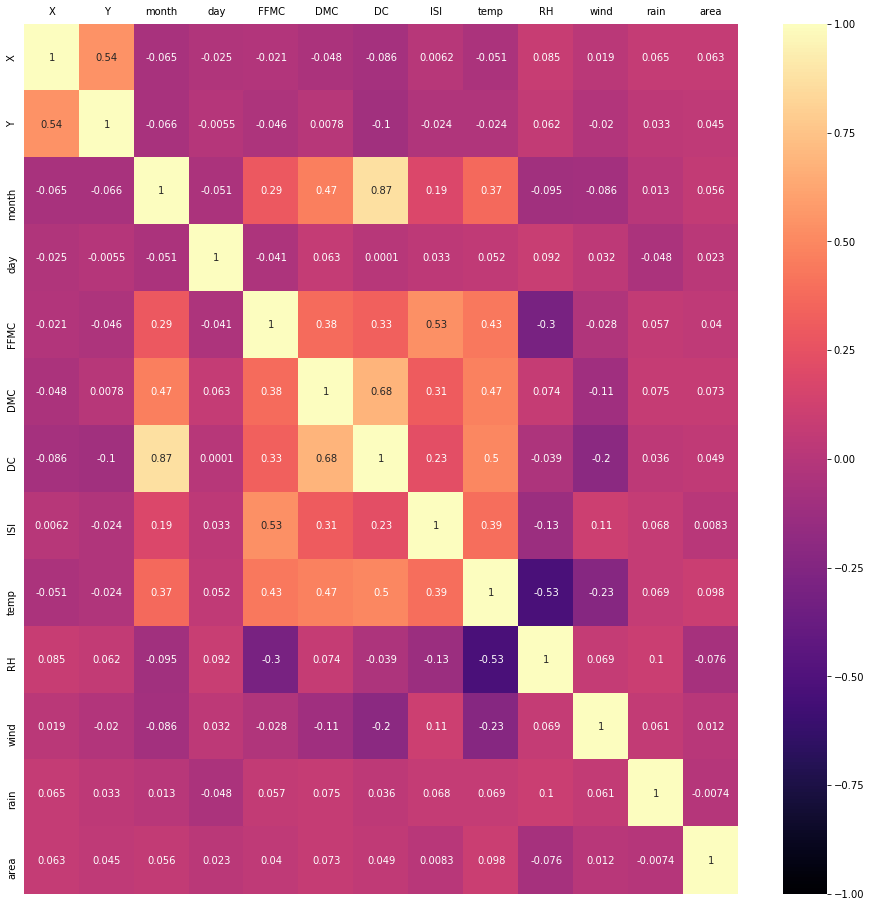

In [92]:
# Plots correlation matrix between features in UCI dataset
plt.figure(figsize=(16, 16))
ax = sns.heatmap(uci.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='magma')
ax.tick_params(axis='both', which='both', labelsize=10, labelbottom = False, left=False, bottom=False, top = False, labeltop=True)

In [93]:
print(uci["Y"].unique())

[5 4 6 3 2 9 8]


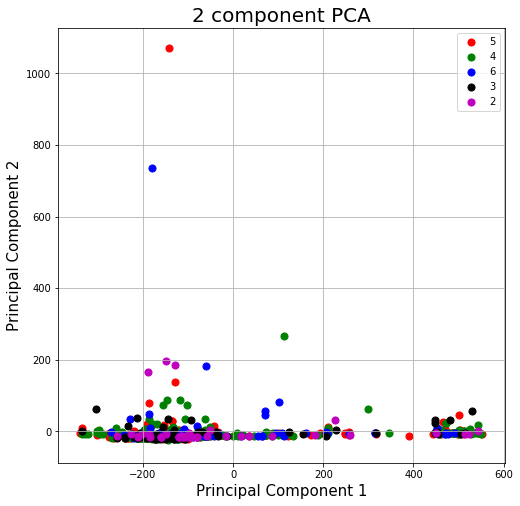

In [94]:
targets = uci["Y"].unique()
X = uci.drop(columns=['Y'])
colors = ['r', 'g', 'b', 'k', 'm']
#project to 2D space so we can visualize it
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, uci['Y']], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Regression and Classification

In [29]:
# Normalization
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
x = uci.values
X_train, X_test, y_train, y_test = train_test_split(x[:, 0:-1], x[:, -1], test_size=0.2, random_state=42, shuffle=True)
normalizer = Normalizer()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

In [32]:
# Non-normalized data for Classification
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
x = uci.values
X_train, X_test, y_train, y_test = train_test_split(x[:, 0:-1], x[:, -1], test_size=0.2, random_state=42, shuffle=True)


In [34]:
from sklearn.ensemble import RandomForestClassifier
x = uci.values
bins = [0, 0.25, 10, 100, 300, 1000, 5000]
# Conversion from hectares to acres to fire size code
x[:, -1] = np.digitize(x[:, -1] * 2.47105, bins)
X_train, X_test, y_train, y_test = train_test_split(x[:, 0:-1], x[:, -1], test_size=0.2, random_state=42, shuffle=True)
forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train.ravel())
score = forest.score(X_test, y_test)
print(score)

0.5288461538461539


In [111]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=forest, random_state=1)
ada.fit(X_train, y_train.ravel())
score = ada.score(X_test, y_test)
print(score)

0.49038461538461536


In [112]:
from sklearn.naive_bayes import ComplementNB
bayes = ComplementNB()
bayes.fit(X_train, y_train.ravel())
score = bayes.score(X_test, y_test)
print(score)

0.3173076923076923


In [113]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_train, y_train.ravel())
score = bayes.score(X_test, y_test)
print(score)

0.28846153846153844


In [40]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train.ravel())
score = clf.score(X_test, y_test)
print(score)

0.5192307692307693
6.0


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout


model = Sequential()
model.add(Dense(16, input_dim=12, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#convert labels to one-hot encodings first
print(y_train[0])
y_train = y_train.astype(int)
y_test = y_test.astype(int)
y_train_enc = np.zeros((y_train.size, y_train.max()))
y_train_enc[np.arange(y_train.size),y_train - 1] = 1

y_test_enc = np.zeros((y_test.size, y_test.max()+1))
y_test_enc[np.arange(y_test.size),y_test] = 1

model.fit(X_train, y_train_enc, epochs=20)